In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
mnist.train.images[0].shape

(784,)

In [5]:
mnist.train.images[0][251:260]

array([ 0.        ,  0.        ,  0.        ,  0.54901963,  0.98431379,
        0.99607849,  0.99607849,  0.99607849,  0.99607849], dtype=float32)

/usr/lib/python2.7/dist-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


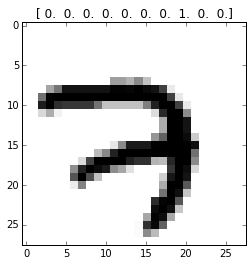

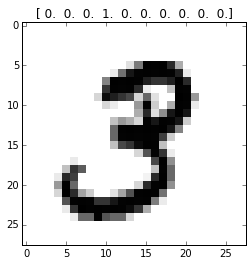

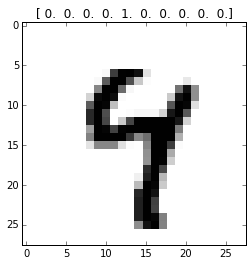

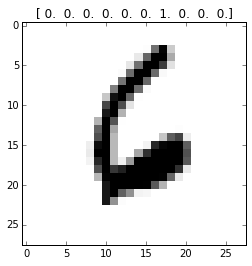

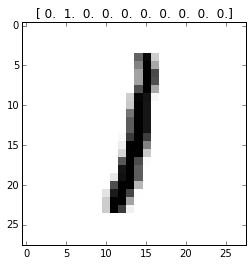

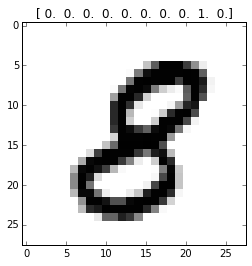

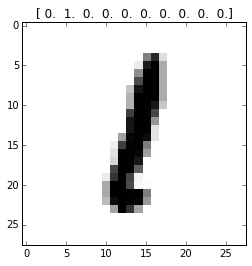

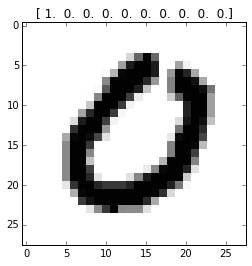

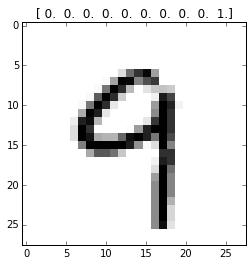

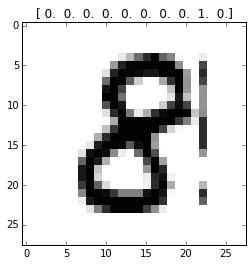

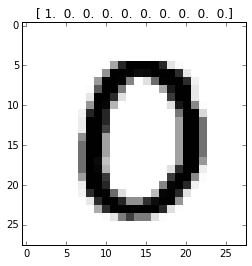

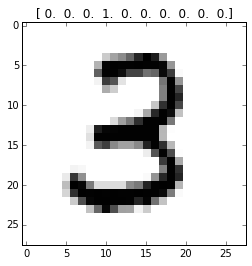

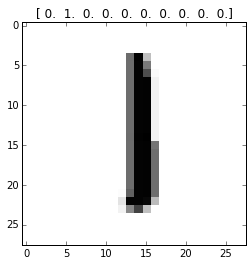

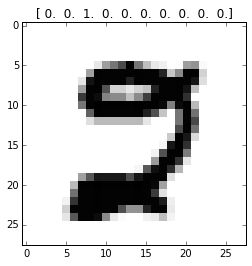

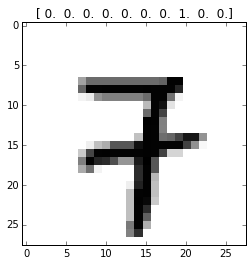

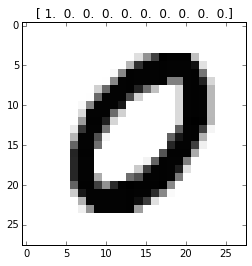

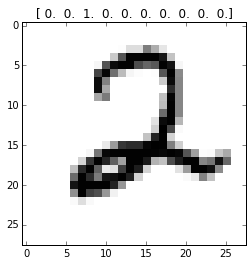

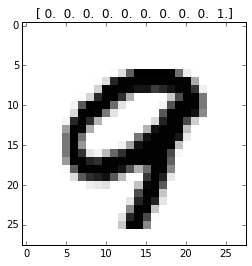

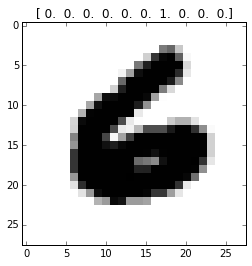

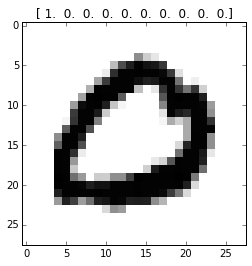

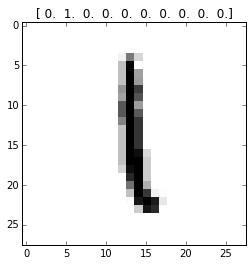

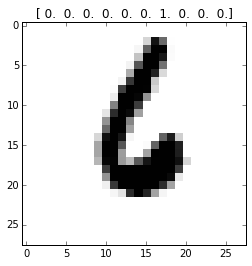

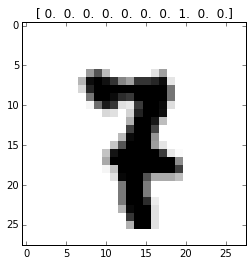

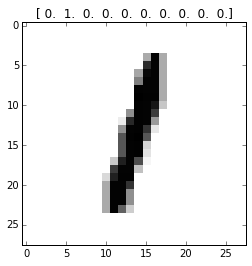

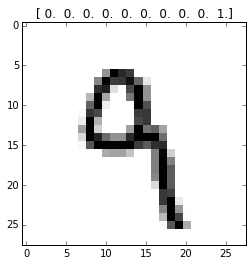

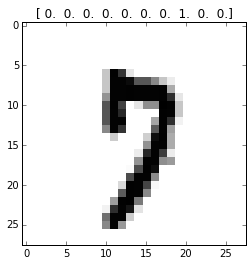

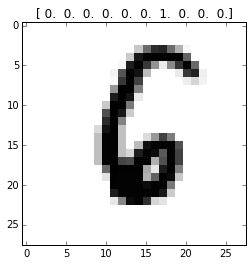

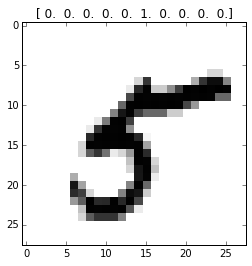

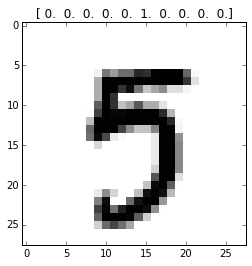

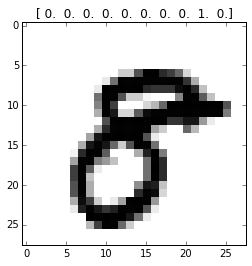

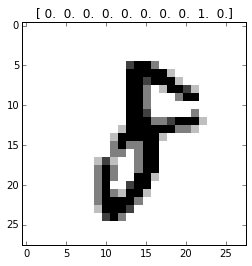

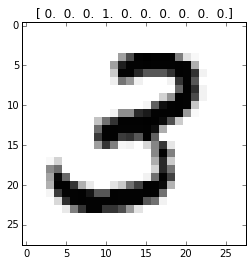

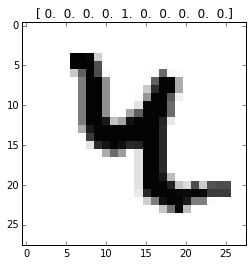

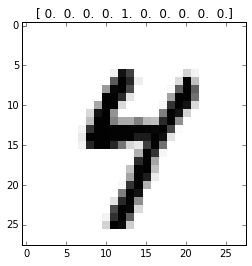

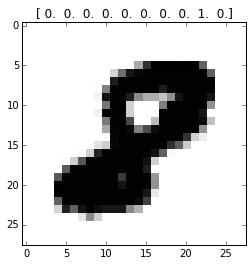

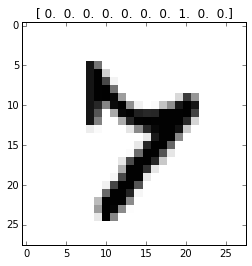

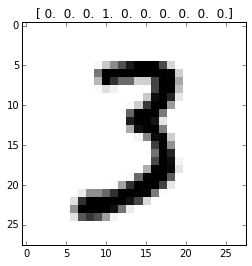

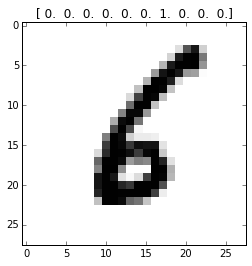

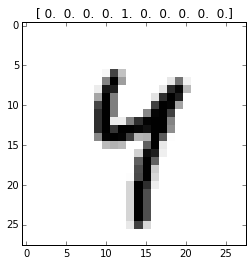

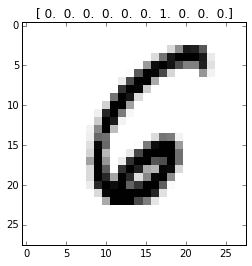

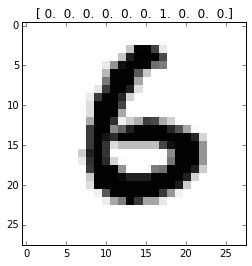

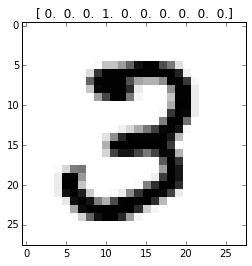

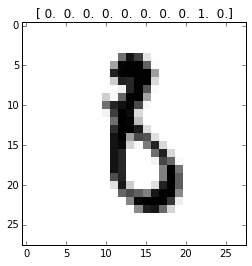

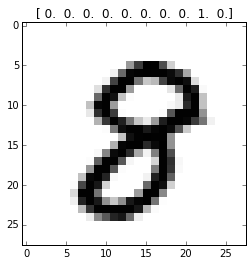

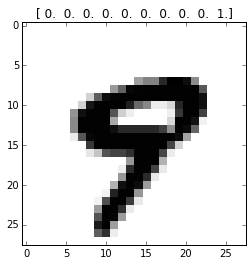

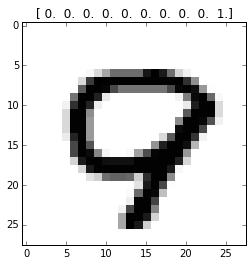

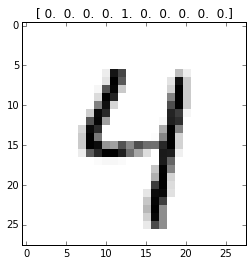

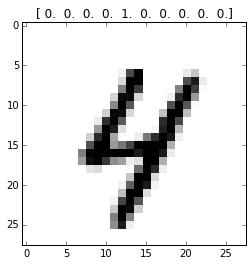

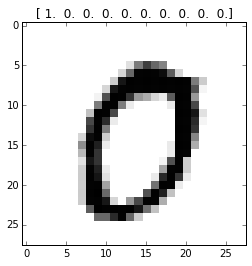

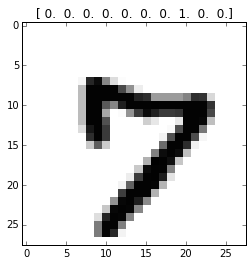

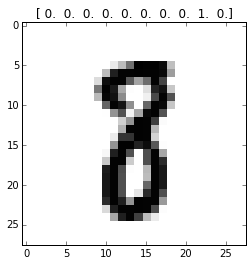

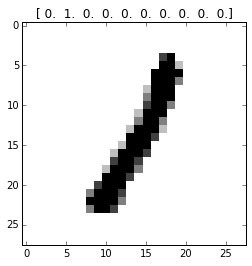

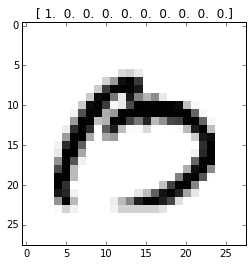

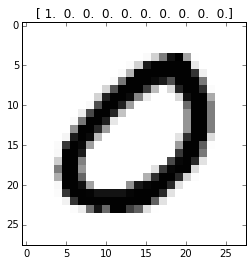

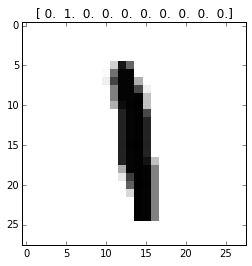

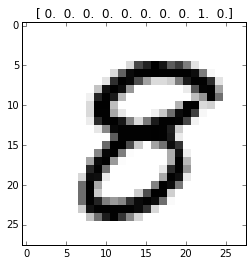

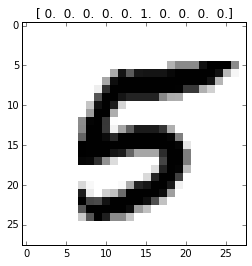

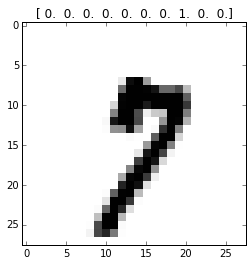

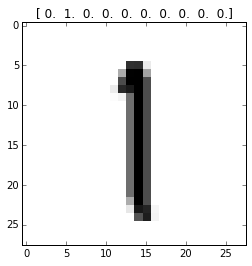

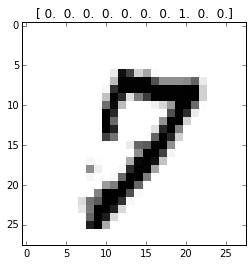

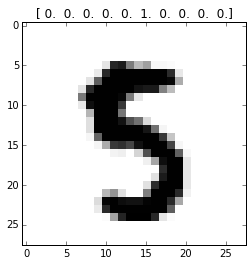

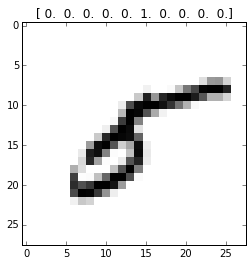

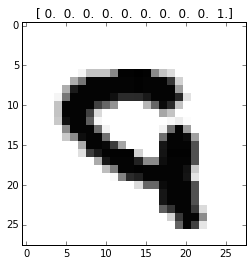

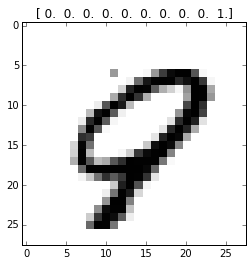

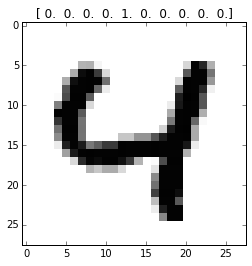

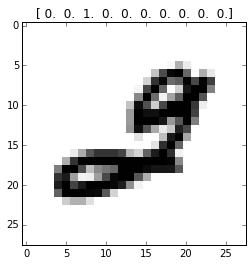

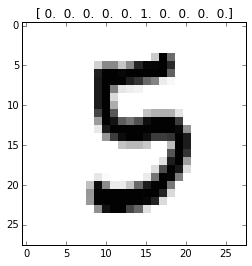

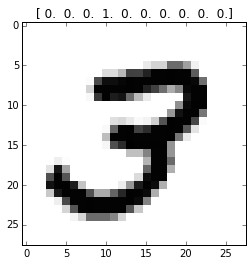

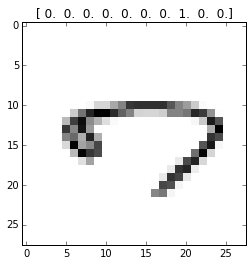

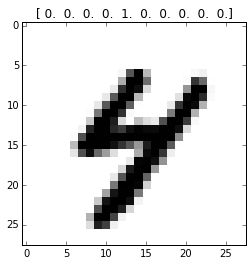

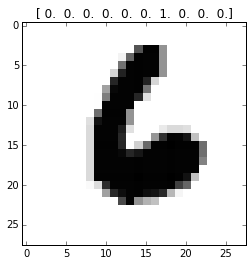

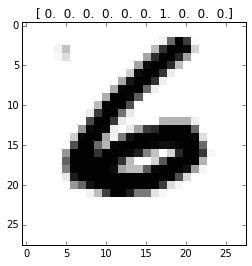

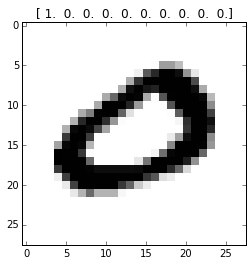

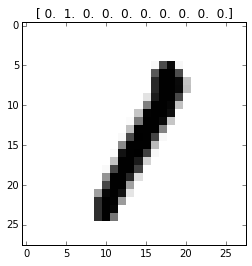

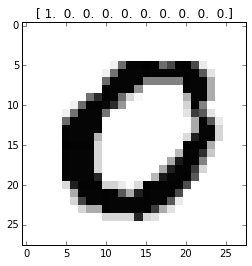

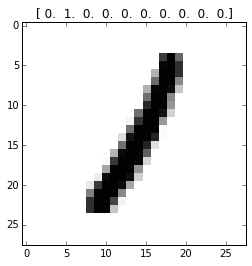

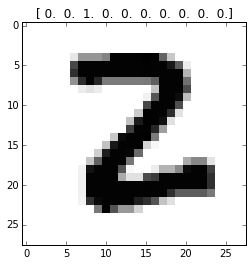

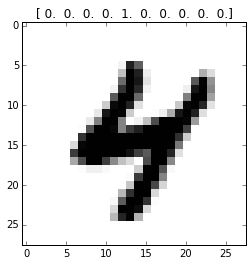

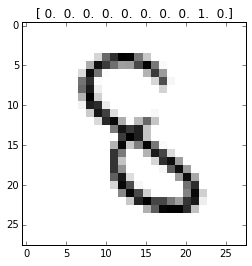

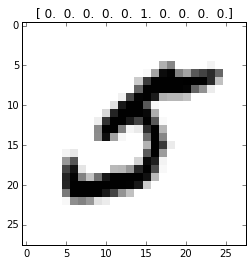

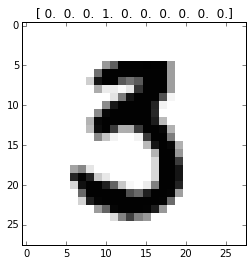

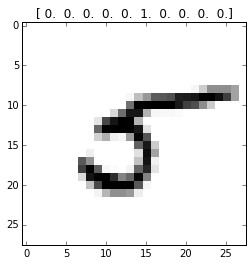

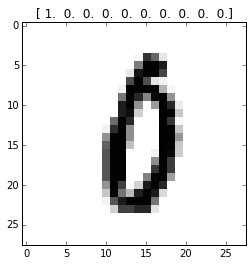

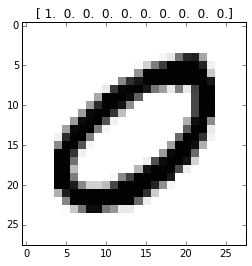

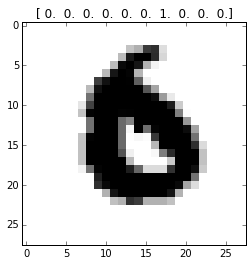

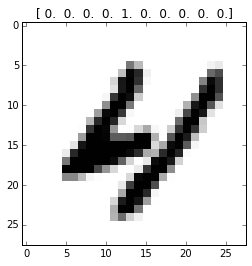

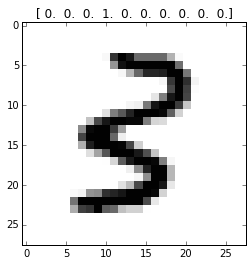

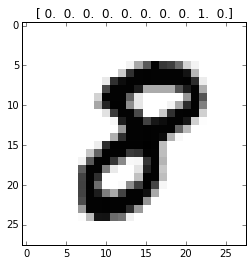

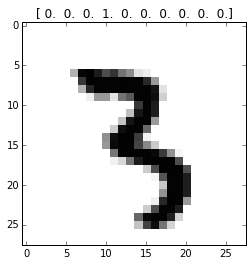

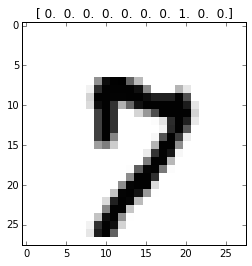

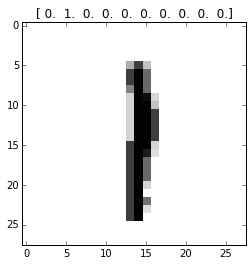

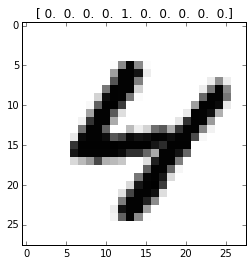

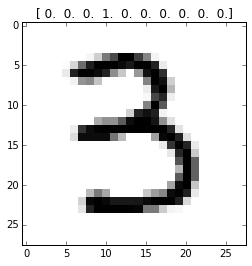

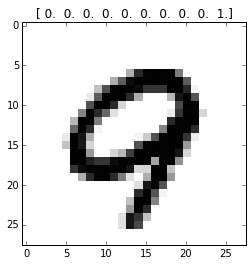

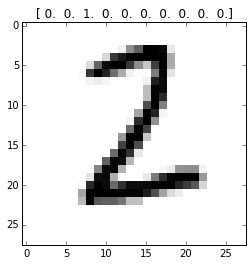

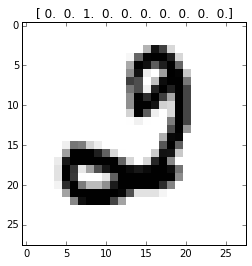

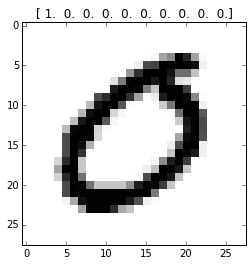

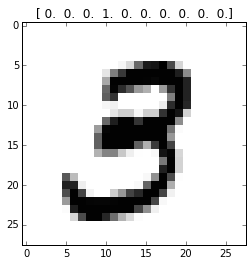

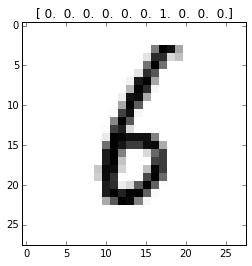

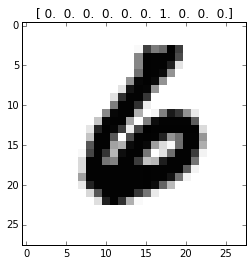

In [6]:
for i in range(100):
    plt.figure()
    plt.imshow(-mnist.train.images[i].reshape(28,28),interpolation='nearest', cmap='gray')
    plt.title(mnist.train.labels[i])

In [7]:
import pywt

In [8]:
data = mnist.train.images[0].reshape(28,28)
coeffs = pywt.wavedec2(data, 'haar')
for i in range(1,len(coeffs)):
    print i, coeffs[i][0].shape, coeffs[i][1].shape, coeffs[i][2].shape

1 (2, 2) (2, 2) (2, 2)
2 (4, 4) (4, 4) (4, 4)
3 (7, 7) (7, 7) (7, 7)
4 (14, 14) (14, 14) (14, 14)


In [37]:
def init_coeffs_mnist(coeffs):
    coeffs_zero = [np.zeros((2,2))]
    for h in range(1,5):
        coeffs_zero += [[]]   
        for k in range(3) :
            s = np.shape(coeffs[h][k])        
            coeffs_zero[h] += [np.zeros(s)]        
    return coeffs_zero    

In [52]:
def add_coeffs_coord(coeffs_ref, coeffs_add, coord):
    v_test = np.array(coeffs_add[0])
    if np.linalg.norm(v_test) < 1e-16:
        coeffs_add[0] = np.copy(coeffs_ref[0])
    for h in range(1,5):
        h_opp = 5 - h
        i = int(coord[0] / 2**h_opp) 
        j = int(coord[1] / 2**h_opp)
        print i, j
        v_test = np.array([coeffs_add[h][0][i,j], coeffs_add[h][1][i,j], coeffs_add[h][2][i,j]])
        if np.linalg.norm(v_test) < 1e-16:
            for k in range(3) :
                coeffs_add[h][k][i,j] = coeffs_ref[h][k][i,j]
            

In [39]:
def copy_coeffs_mnist(coeffs):
    coeffs_copy = []
    coeffs_copy += [coeffs[0].copy()]
    for h in range(1,5):
        coeffs_copy += [[]]    
        for k in range(3) :
            coeffs_copy[h] += [np.copy(coeffs[h][k])]
    return coeffs_copy    

In [11]:
def calcule_path(coord, axes):
    path_i = []
    path_j = []
    for h in range(0,5):
        h_opp = 5 - h
        coord_i = int(coord[0] / 2**h_opp) 
        coord_j = int(coord[1] / 2**h_opp)    
        path_i += [axes[h][coord_i]]
        path_j += [axes[h][coord_j]]
    return path_i, path_j

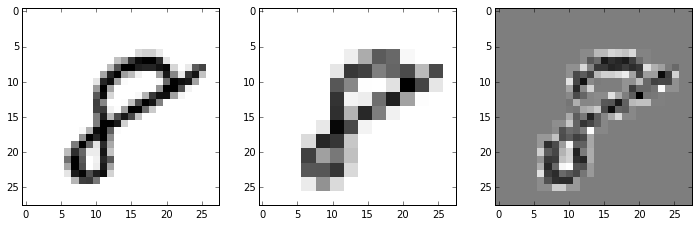

In [40]:
coeffs_test = copy_coeffs_mnist(coeffs)
coeffs_zero = init_coeffs_mnist(coeffs)
        
plt.figure(figsize=(12,8))
plt.subplot(131)
plt.imshow(-pywt.waverec2(coeffs_test, 'haar'), interpolation='nearest', cmap='gray')

for k in range(3) :
    coeffs_test[4][k] *= 0
    coeffs_zero[4][k] = np.copy(coeffs[4][k])
    
plt.subplot(132)
plt.imshow(-pywt.waverec2(coeffs_test, 'haar'), interpolation='nearest', cmap='gray')

plt.subplot(133)
plt.imshow(-pywt.waverec2(coeffs_zero, 'haar'), interpolation='nearest', cmap='gray')

In [45]:
axes = []
for h in range(0,5):
    h_opp = 5 - h
    b_moins = -.5
    b_plus = 27.5
    intervalle = b_plus - b_moins
    coord_max = int(26.5 / 2**h_opp) + 1
    unite = max(intervalle / coord_max, 2**h_opp)
    print unite
    coords = []
    for j in range(coord_max):
        coords += [b_moins + (j+.5) * unite]
    axes += [coords]
print axes
print ''

U = []
for h in range(len(axes)):
    #U_ref = {}
    #for pos_i in axes[h]:
    #    for pos_j in axes[h]:
    #        U_ref[h] += [(pos_i, pos_j)]
    U += [{}]
    for i in range(len(axes[h])):
        for j in range(len(axes[h])):
            U[h][(i,j)] = (axes[h][i], axes[h][j])    
    print 'Niveau ', h, ' : '
    print ' U[' , h, '] :', U[h]
    #print ' U_ref[h] :', U_ref[h]
    print ''

32
16
8
4.0
2.0
[[15.5], [7.5, 23.5], [3.5, 11.5, 19.5, 27.5], [1.5, 5.5, 9.5, 13.5, 17.5, 21.5, 25.5], [0.5, 2.5, 4.5, 6.5, 8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5, 22.5, 24.5, 26.5]]

Niveau  0  : 
 U[ 0 ] : {(0, 0): (15.5, 15.5)}

Niveau  1  : 
 U[ 1 ] : {(0, 1): (7.5, 23.5), (1, 0): (23.5, 7.5), (0, 0): (7.5, 7.5), (1, 1): (23.5, 23.5)}

Niveau  2  : 
 U[ 2 ] : {(0, 1): (3.5, 11.5), (1, 2): (11.5, 19.5), (3, 2): (27.5, 19.5), (0, 0): (3.5, 3.5), (3, 3): (27.5, 27.5), (3, 0): (27.5, 3.5), (3, 1): (27.5, 11.5), (2, 1): (19.5, 11.5), (0, 2): (3.5, 19.5), (2, 0): (19.5, 3.5), (1, 3): (11.5, 27.5), (2, 3): (19.5, 27.5), (2, 2): (19.5, 19.5), (1, 0): (11.5, 3.5), (0, 3): (3.5, 27.5), (1, 1): (11.5, 11.5)}

Niveau  3  : 
 U[ 3 ] : {(1, 3): (5.5, 13.5), (6, 6): (25.5, 25.5), (3, 0): (13.5, 1.5), (5, 4): (21.5, 17.5), (2, 1): (9.5, 5.5), (5, 6): (21.5, 25.5), (2, 6): (9.5, 25.5), (1, 6): (5.5, 25.5), (5, 1): (21.5, 5.5), (2, 5): (9.5, 21.5), (0, 3): (1.5, 13.5), (4, 0): (17.5, 1.5), (1, 2):

0 0
1 1
2 2
5 5
0 1
1 2
2 4
4 8
1 0
2 0
4 1
8 2


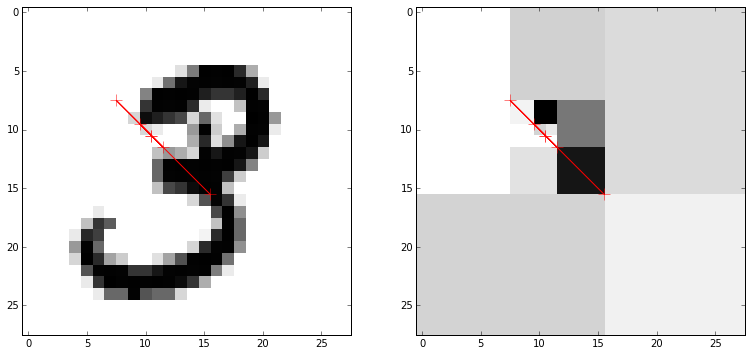

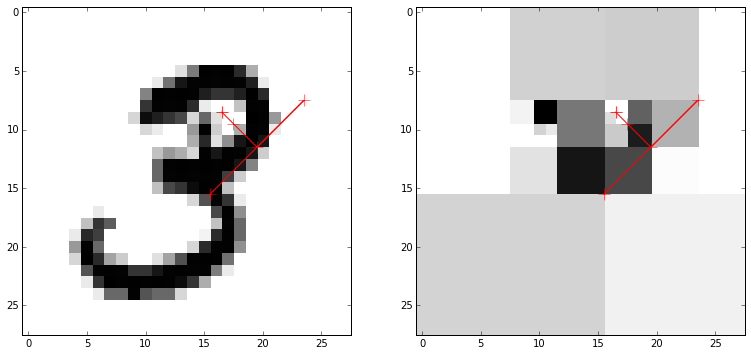

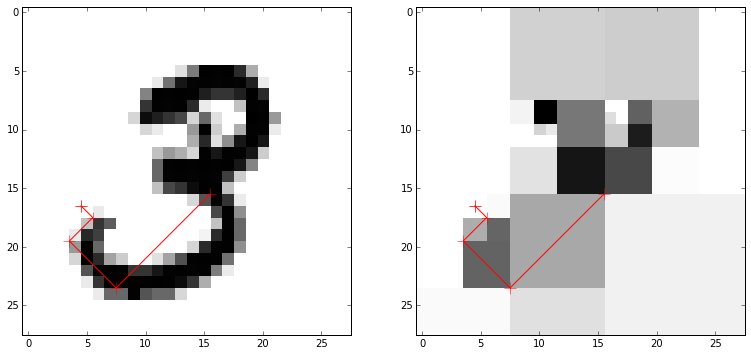

In [57]:
#coord = (10.5,10.5)
#coord = (8.5,16.5)
#coord = (16.5,4.5)

t = 1

data = mnist.train.images[t].reshape(28,28)
coeffs = pywt.wavedec2(data, 'haar')

coeffs_coord = init_coeffs_mnist(coeffs)

for coord in [(10.5,10.5), (8.5,16.5), (16.5,4.5)]:
    add_coeffs_coord(coeffs, coeffs_coord, coord)

    plt.figure(figsize=(20,12))

    path_i, path_j = calcule_path(coord, axes)

    plt.subplot(131)
    plt.imshow(-pywt.waverec2(coeffs, 'haar'), interpolation='nearest', cmap='gray')
    #for u in U_ref:
    #    plt.plot(u[1],u[0],'+',color='b',markersize=12)
    plt.plot(path_j,path_i,'r')
    plt.plot(path_j,path_i,'r+',markersize=12)
    plt.plot(coord[1],coord[0],'+',color='r',markersize=12)
    plt.xlim([b_moins,b_plus])
    plt.ylim([b_moins,b_plus])
    plt.gca().invert_yaxis()

    plt.subplot(132)
    plt.imshow(-pywt.waverec2(coeffs_coord, 'haar'), interpolation='nearest', cmap='gray')
    plt.plot(path_j,path_i,'r')
    plt.plot(path_j,path_i,'r+',markersize=12)
    plt.plot(coord[1],coord[0],'+',color='r',markersize=12)
    plt.xlim([b_moins,b_plus])
    plt.ylim([b_moins,b_plus])
    plt.gca().invert_yaxis()


## Creation de la base

In [16]:
len(mnist.train.images)

55000

In [58]:
B = []
for i in range(len(mnist.train.images)):
    c = np.where(mnist.train.labels[i] ==1)[0][0]
    x = mnist.train.images[i].reshape(28,28)
    coeffs = pywt.wavedec2(x, 'haar')
    u0 = (0,0) #U[0][0]
    v0 = np.array([coeffs[0][0][1], coeffs[0][1][0], coeffs[0][1][1]])
    B += [(v0,(c, 0, u0))]
    for h in range(1,5):
        for u in U[h]:
            #v = np.array([coeffs[h][0][u[1]][u[2]], coeffs[h][1][u[1]][u[2]], coeffs[h][2][u[1]][u[2]]])
            v = np.array([coeffs[h][0][u[0]][u[1]], coeffs[h][1][u[0]][u[1]], coeffs[h][2][u[0]][u[1]]])
            #if np.linalg.norm(v) > 1e-16:
            #B += [(v,(c,u))]
            B += [(v,(c,h,u))]            

In [59]:
len(B)

14630000

In [61]:
B[2]

(array([-2.17941141, -0.5573529 ,  0.33725476], dtype=float32), (7, 1, (0, 0)))

In [60]:
B[2]

(array([ 1.1147058 , -1.06960785, -0.65686274], dtype=float32), (7, 1, (1, 0)))

## Dictionnaire

In [62]:
Data = [[],[],[],[],[],[],[],[],[],[]]
for c in range(10):
    Data[c] = [{},{},{},{},{}] 
    
for d in B:
    v = d[0]
    c = d[1][0]
    h = d[1][1]
    pos = d[1][2]
    if pos in Data[c][h]:
        Data[c][h][pos] += [v]
    else:
        Data[c][h][pos] = [v]


In [21]:
print np.mean(Data[0][0][(0,0)],0)
print np.mean(Data[0][1][(0,0)],0)
print np.mean(Data[0][1][(0,1)],0)
print np.mean(Data[0][2][(0,0)],0)
print np.mean(Data[0][2][(0,1)],0)


[ 2.35478973  2.46233153  1.25776315]
[-1.27351904 -1.81026828  0.58487535]
[-0.97309089  2.17159939 -0.80081075]
[-0.01363159 -0.01381042  0.01355992]
[-1.22357678 -0.67644197  0.66505671]


In [64]:
c = 1
h = 0
i = 0
j = 0
len(Data[c][h][(i,j)])

6179

'for angle in range(0, 360):\n    ax.view_init(30, angle)\n    plt.draw()\n    plt.pause(.001)'

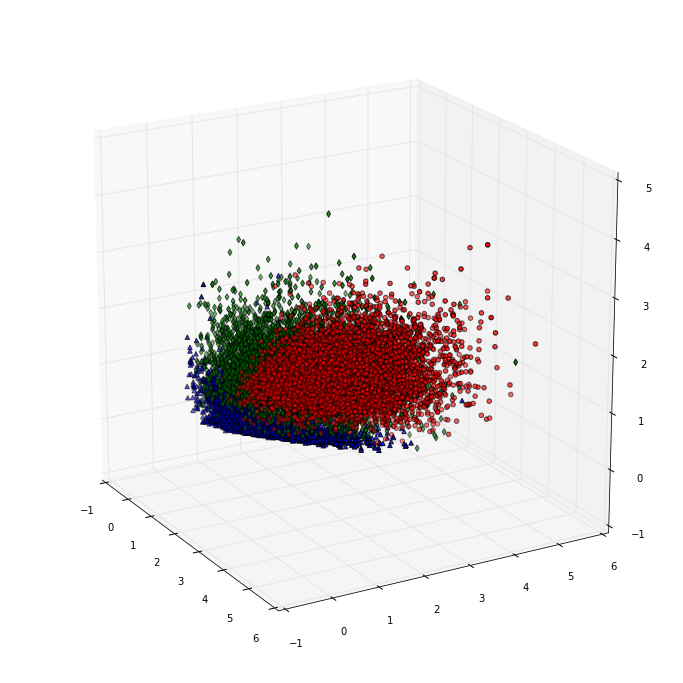

In [66]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')

h = 0 #4
i = 0 #5
j = 0 #5

test = np.array(Data[0][h][(i,j)])
ax.scatter(test[:,0], test[:,1], test[:,2],c='r', marker = 'o')

test2 = np.array(Data[1][h][(i,j)])
ax.scatter(test2[:,0], test2[:,1], test2[:,2],c='b', marker = '^')

test3 = np.array(Data[3][h][(i,j)])
ax.scatter(test3[:,0], test3[:,1], test3[:,2],c='g', marker = 'd')

ax.view_init(20, -30)

'''for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)'''

## Probas elementaires 

In [67]:
mu = []
Sigma = []
for c in range(10):
    mu += [[]]
    Sigma += [[]]
    for h in range(5):
        mu[c] += [{}]
        Sigma[c] += [{}]
        for u in U[h]:
            #u_ref = (u[1],u[2])
            if u in Data[c][h]:
                if len(Data[c][h][u]) > 1:
                    mu[c][h][u] = np.mean(Data[c][h][u],0)
                    Sigma[c][h][u] = np.cov(np.array(Data[c][h][u]).T)
            

In [69]:
c = 0
h = 0
u = (0,0)
print mu[c][h][u]
print Sigma[c][h][u]

[ 2.35478973  2.46233153  1.25776315]
[[ 0.48076908  0.39858945  0.09581381]
 [ 0.39858945  0.43710952  0.09453377]
 [ 0.09581381  0.09453377  0.21786573]]


## Reconstruction


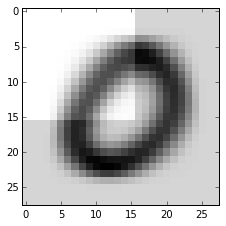

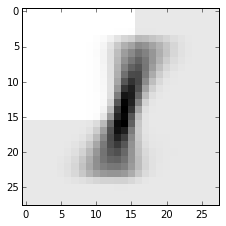

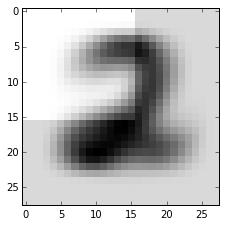

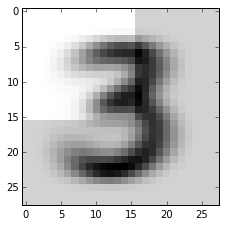

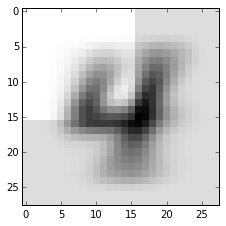

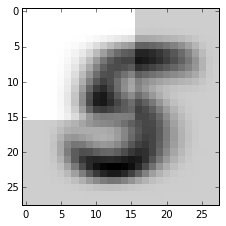

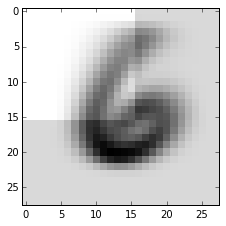

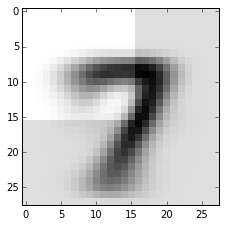

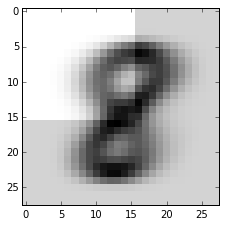

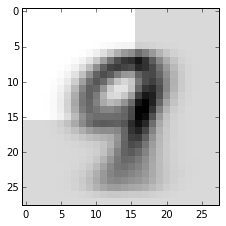

In [72]:
for c in range(10):
    coeffs_zero = init_coeffs_mnist(coeffs)

    coeffs_zero[0][0,1]= mu[c][0][(0,0)][0]
    coeffs_zero[0][1,0] = mu[c][0][(0,0)][1]
    coeffs_zero[0][1,1] = mu[c][0][(0,0)][2]
    for h in range(1,5):
        for u in U[h]:
            coeffs_zero[h][0][u[0]][u[1]] = mu[c][h][u][0]
            coeffs_zero[h][1][u[0]][u[1]] = mu[c][h][u][1]
            coeffs_zero[h][2][u[0]][u[1]] = mu[c][h][u][2]

    plt.figure(figsize=(12,8))
    plt.subplot(131)
    plt.imshow(-pywt.waverec2(coeffs_zero, 'haar'), interpolation='nearest', cmap='gray')



## Test distribution

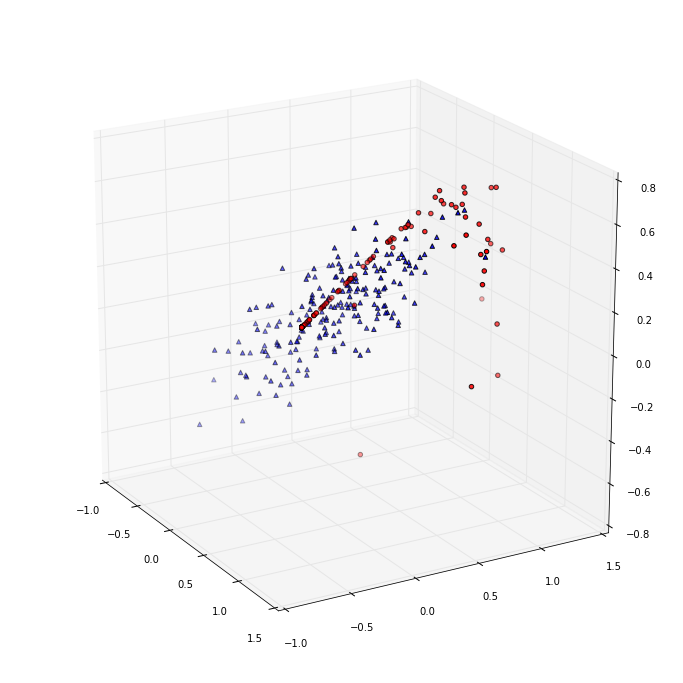

In [74]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')

c = 0
h = 3
u = (5,5)

n = 200

test2 = np.random.multivariate_normal(mu[c][h][u], Sigma[c][h][u] , n)
#test2 = np.random.multivariate_normal(mu[(c,h,u)], Sig_test * 0 , n)
#test2 = np.random.multivariate_normal(-mu[(c,h,u)], np.eye(3,3), n)
ax.scatter(test2[:,0], test2[:,1], test2[:,2],c='b', marker = '^')

#test3 = np.random.multivariate_normal(-mu[(c,h,u)], np.eye(3,3), n)
#ax.scatter(test3[:,0], test3[:,1], test3[:,2],c='g', marker = 'd')

index = np.arange(len(Data[c][h][u]))
np.random.shuffle(index)
test = np.array(Data[c][h][u])
ax.scatter(test[index[:n],0], test[index[:n],1], test[index[:n],2],c='r', marker = 'o')

ax.view_init(20, -30)

## Test proba

In [75]:
from scipy.stats import multivariate_normal

c_ref = 0
#h = 0
#u = (0,0)
for i in range(1):
    for h in range(5):
        print '*************************'
        print '*********' , 'h = ' , h , '************'
        print '*************************'
        for u in U[h]:
            print U[h]
            #u = (u_ref[1],u_ref[2])
            lik = np.zeros(10)
            for c in range(10):
                dist = multivariate_normal(mean = mu[c][h][u], cov = Sigma[c][h][u])
                lik[c] = dist.pdf(Data[c_ref][h][u][i])
            print 'lik =' + str(lik) 
            pi = np.zeros(10)
            for c in range(10):
                pi[c] = lik[c]/lik.sum()
            print 'pi =' + str(pi)
            sum_H = - pi * np.log(lik)
            print np.log(lik)
            print '****', 'c :', c_ref, ', h :', h, ', u :',u, ' ---> ', np.where(pi == max(pi))[0][0]
            print '**** H = ',sum_H.sum()
    

*************************
********* h =  0 ************
*************************
{(0, 0): (15.5, 15.5)}
lik =[  4.94544913e-01   5.58016196e-10   1.94393976e-01   1.60210335e-01
   1.58791184e-02   7.23564889e-02   1.14112965e-01   2.35376207e-02
   1.64855768e-01   1.83847113e-02]
pi =[  3.93033765e-01   4.43476822e-10   1.54492330e-01   1.27325284e-01
   1.26197429e-02   5.75044702e-02   9.06899397e-02   1.87062478e-02
   1.31017187e-01   1.46110335e-02]
[ -0.70411731 -21.30663313  -1.63786838  -1.83126773  -4.14275034
  -2.62615014  -2.1705664   -3.74915526  -1.80268432  -3.99623587]
**** c : 0 , h : 0 , u : (0, 0)  --->  0
**** H =  1.52779541532
*************************
********* h =  1 ************
*************************
{(0, 1): (7.5, 23.5), (1, 0): (23.5, 7.5), (0, 0): (7.5, 7.5), (1, 1): (23.5, 23.5)}
lik =[  3.41867610e-01   1.97704897e-05   3.73030956e-01   3.58071116e+00
   4.80901625e-01   5.82288920e-03   5.57860451e-02   8.32872865e-02
   2.97555878e-01   1.09190472

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
Data[c][h][u][0]

In [ ]:
mu[c][h][u]

In [ ]:
np.log(0.06455255)